In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset1 = pd.read_csv('/content/dl data.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(1,8)
        self.fc2=nn.Linear(8,10)
        self.fc3=nn.Linear(10,1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}

  def forward(self,x):
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [ ]:
ai_brain=NeuralNet()
criterion=nn.MSELoss()
optimizer=optim.RMSprop(ai_brain.parameters(),lr=0.001)
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=5000):

    for epoch in range(epochs):
      optimizer.zero_grad()
      loss=criterion(ai_brain(X_train),y_train)
      loss.backward()
      optimizer.step()




      ai_brain.history['loss'].append(loss.item())
      if epoch % 200 == 0:
          print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


In [ ]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/5000], Loss: 5665.291992
Epoch [200/5000], Loss: 4453.380371
Epoch [400/5000], Loss: 2378.342041
Epoch [600/5000], Loss: 808.292419
Epoch [800/5000], Loss: 440.970978
Epoch [1000/5000], Loss: 312.724030
Epoch [1200/5000], Loss: 162.989014
Epoch [1400/5000], Loss: 49.826744
Epoch [1600/5000], Loss: 6.388186
Epoch [1800/5000], Loss: 0.251655
Epoch [2000/5000], Loss: 0.020087
Epoch [2200/5000], Loss: 0.002089
Epoch [2400/5000], Loss: 0.015757
Epoch [2600/5000], Loss: 0.007837
Epoch [2800/5000], Loss: 0.010766
Epoch [3000/5000], Loss: 0.011335
Epoch [3200/5000], Loss: 0.010355
Epoch [3400/5000], Loss: 0.010709
Epoch [3600/5000], Loss: 0.010709
Epoch [3800/5000], Loss: 0.010695
Epoch [4000/5000], Loss: 0.010712
Epoch [4200/5000], Loss: 0.010704
Epoch [4400/5000], Loss: 0.010699
Epoch [4600/5000], Loss: 0.010704
Epoch [4800/5000], Loss: 0.010699


In [ ]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 3.106505


In [ ]:
loss_df = pd.DataFrame(ai_brain.history)

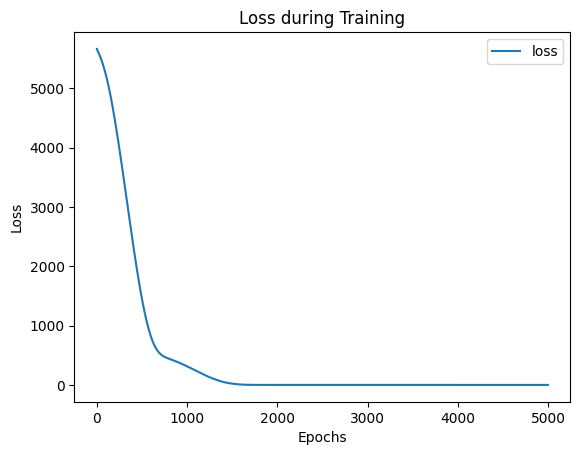

In [ ]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()


In [ ]:
X_n1_1 = torch.tensor([[14]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')


Prediction: 141.17567443847656
